# **Projet M2 Big Data : Plateforme de recommandation des produits Chanel**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from io import BytesIO
from collections import Counter

## **Partie 1 : Analyse approfondie du jeu de données**

### **1. Exploration initiale**

In [ ]:
df = pd.read_parquet("hf://datasets/DBQ/Chanel.Product.prices.Germany/data/train-00000-of-00001-d681c47b79d4401f.parquet")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   website_name     1428 non-null   object 
 1   competence_date  1428 non-null   object 
 2   country_code     1428 non-null   object 
 3   currency_code    1428 non-null   object 
 4   brand            1428 non-null   object 
 5   category1_code   1428 non-null   object 
 6   category2_code   1428 non-null   object 
 7   category3_code   1428 non-null   object 
 8   product_code     1428 non-null   object 
 9   title            1428 non-null   object 
 10  itemurl          1428 non-null   object 
 11  imageurl         1428 non-null   object 
 12  full_price       1428 non-null   float64
 13  price            1428 non-null   float64
 14  full_price_eur   1428 non-null   float64
 15  price_eur        1428 non-null   float64
 16  flg_discount     1428 non-null   int64  
dtypes: float64(4),

#### **° Analyse des colonnes du dataset, notamment category2_code, title, image, et price.**

Colonne : title
Longueur minimale : 4
Longueur maximale : 162
Longueur moyenne : 39.056022408963585
Distribution des longueurs :


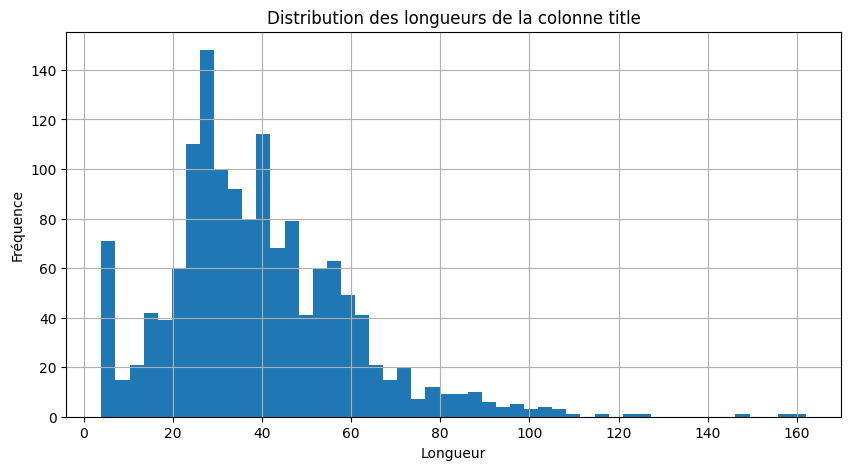

--------------------
Colonne : imageurl
Longueur minimale : 90
Longueur maximale : 383
Longueur moyenne : 270.9306722689076
Distribution des longueurs :


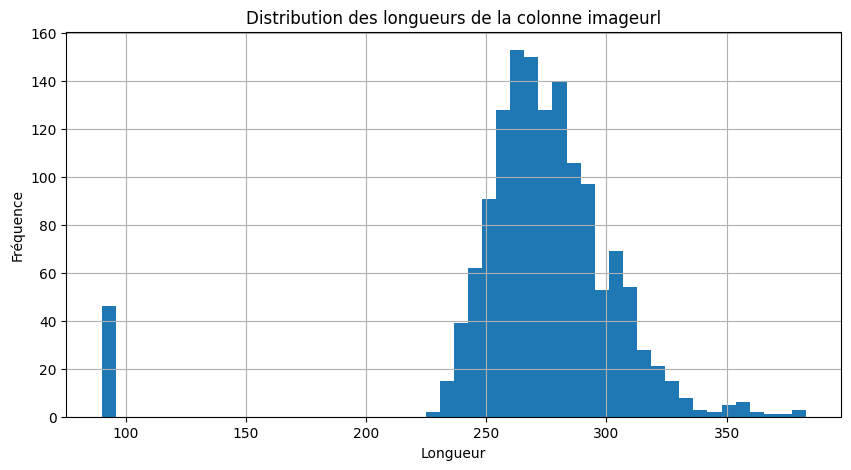

--------------------
Colonne : category1_code
Longueur minimale : 6
Longueur maximale : 9
Longueur moyenne : 7.266806722689076
Distribution des longueurs :


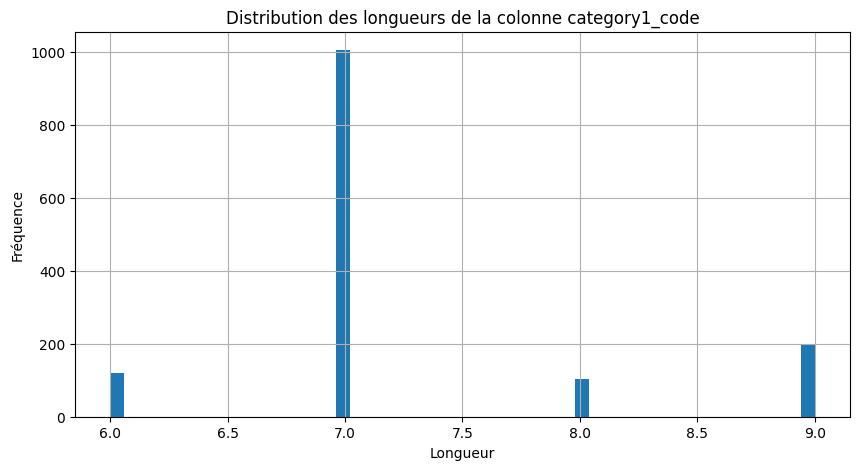

--------------------
Colonne : category2_code
Longueur minimale : 3
Longueur maximale : 27
Longueur moyenne : 10.241596638655462
Distribution des longueurs :


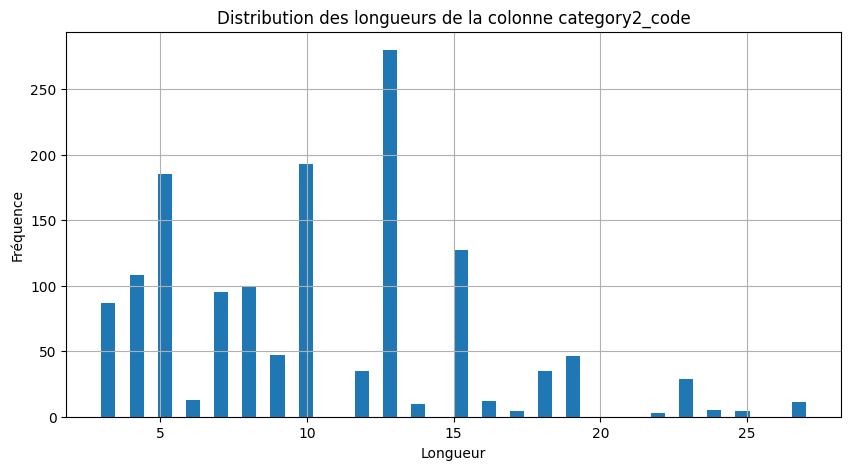

--------------------


In [ ]:
for col in ['title', 'imageurl', 'category1_code', 'category2_code']:
    if col in df.columns:
        print(f"Colonne : {col}")
        print(f"Longueur minimale : {df[col].astype(str).str.len().min()}")
        print(f"Longueur maximale : {df[col].astype(str).str.len().max()}")
        print(f"Longueur moyenne : {df[col].astype(str).str.len().mean()}")
        print(f"Distribution des longueurs :")
        plt.figure(figsize=(10, 5))
        df[col].astype(str).str.len().hist(bins=50)  # Ajuster le nombre de bins si nécessaire
        plt.xlabel("Longueur")
        plt.ylabel("Fréquence")
        plt.title(f"Distribution des longueurs de la colonne {col}")
        plt.show()
        print("-" * 20)
    else:
        print(f"La colonne {col} n'existe pas dans le DataFrame.")

#### **° Distribution des catégories (category2_code), des prix, et longueur des descriptions (title).**

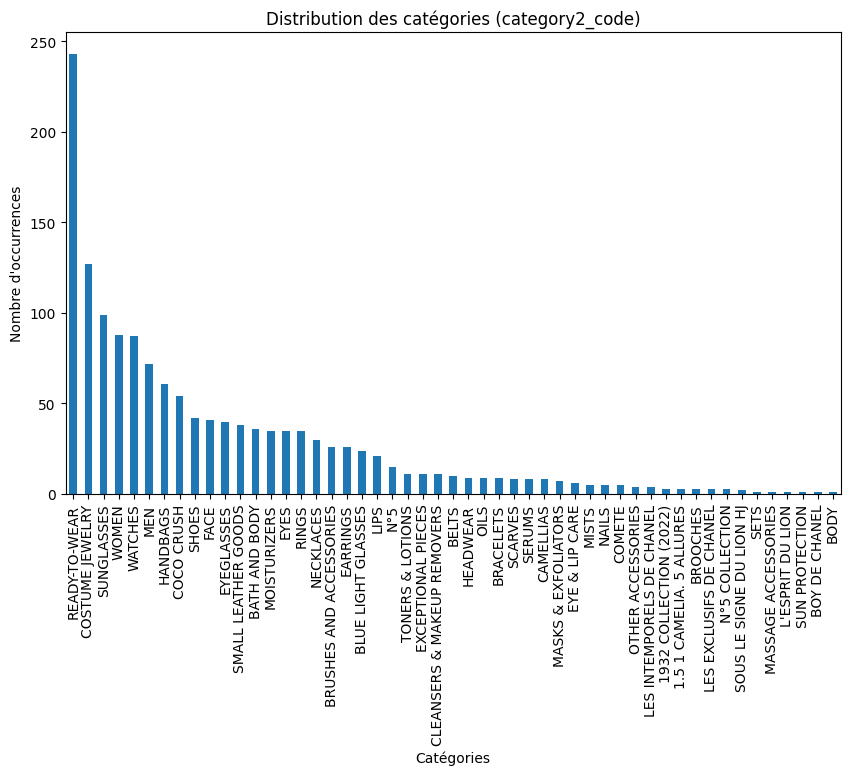

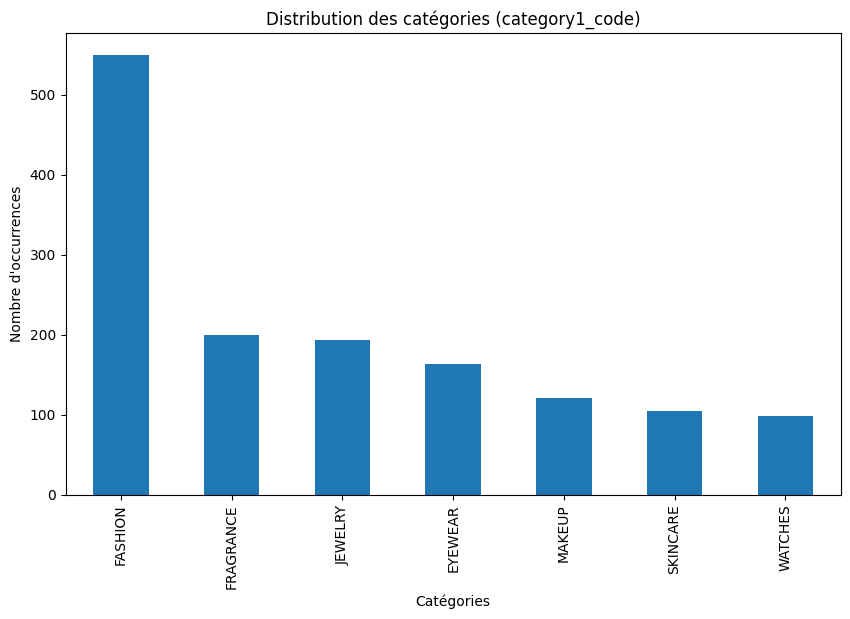

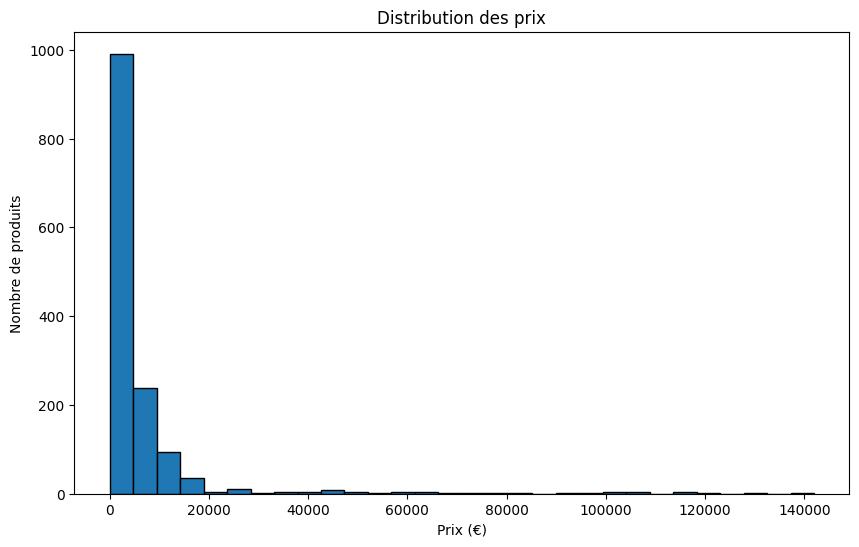

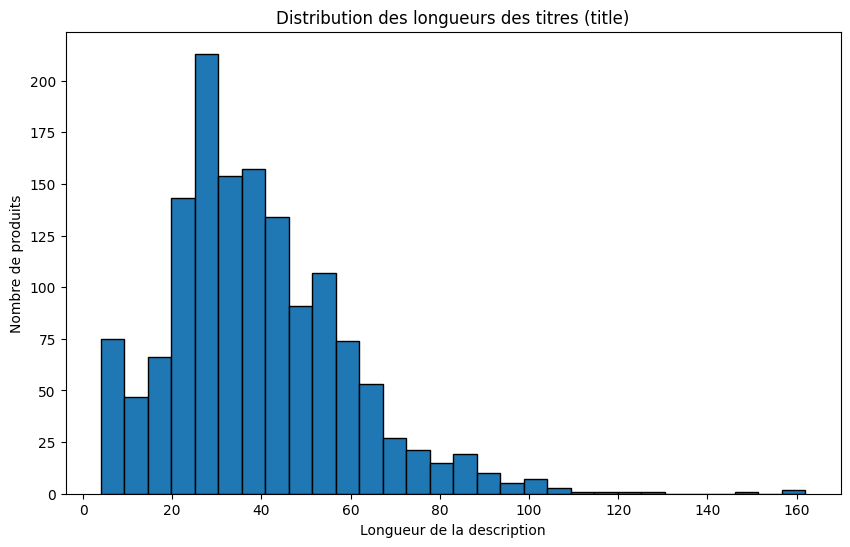

In [ ]:
plt.figure(figsize=(10, 6))
df['category2_code'].value_counts().plot(kind='bar')
plt.title("Distribution des catégories (category2_code)")
plt.xlabel("Catégories")
plt.ylabel("Nombre d'occurrences")
plt.show()

plt.figure(figsize=(10, 6))
df['category1_code'].value_counts().plot(kind='bar')
plt.title("Distribution des catégories (category1_code)")
plt.xlabel("Catégories")
plt.ylabel("Nombre d'occurrences")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='k')
plt.title('Distribution des prix')
plt.xlabel('Prix (€)')
plt.ylabel('Nombre de produits')
plt.show()

df['title_length'] = df['title'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
plt.hist(df['title_length'], bins=30, edgecolor='k')
plt.title('Distribution des longueurs des titres (title)')
plt.xlabel('Longueur de la description')
plt.ylabel('Nombre de produits')
plt.show()

#### **° Décrire statistiquement les colonnes numériques (price) : moyenne, médiane, écart-type, etc..**

In [ ]:
price_stats = df['price'].describe()
price_stats

count      1428.000000
mean       6076.253725
std       15219.005999
min          23.000000
25%         195.000000
50%        1415.000000
75%        5800.000000
max      142000.000000
Name: price, dtype: float64

* **Examiner les colonnes textuelles (title) pour leur longueur et
distribution.**


count    1428.000000
mean       39.056022
std        20.365571
min         4.000000
25%        26.000000
50%        36.000000
75%        51.000000
max       162.000000
Name: title_length, dtype: float64


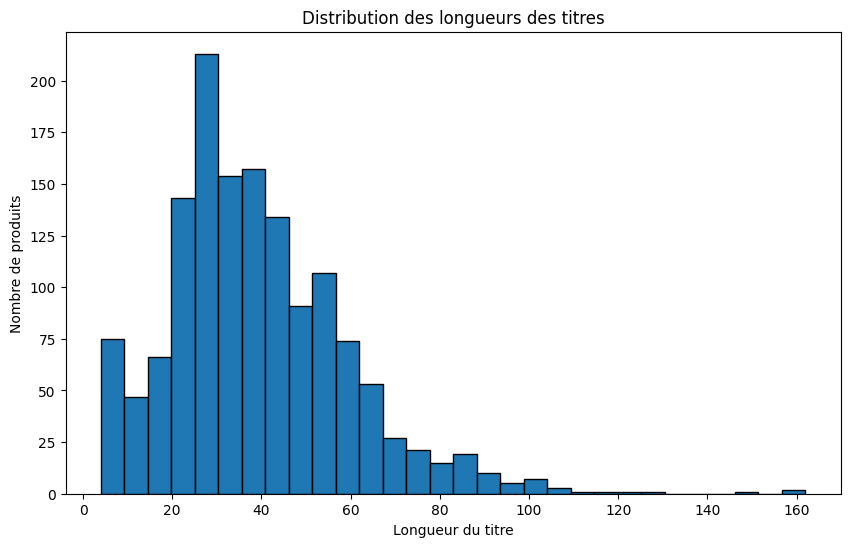

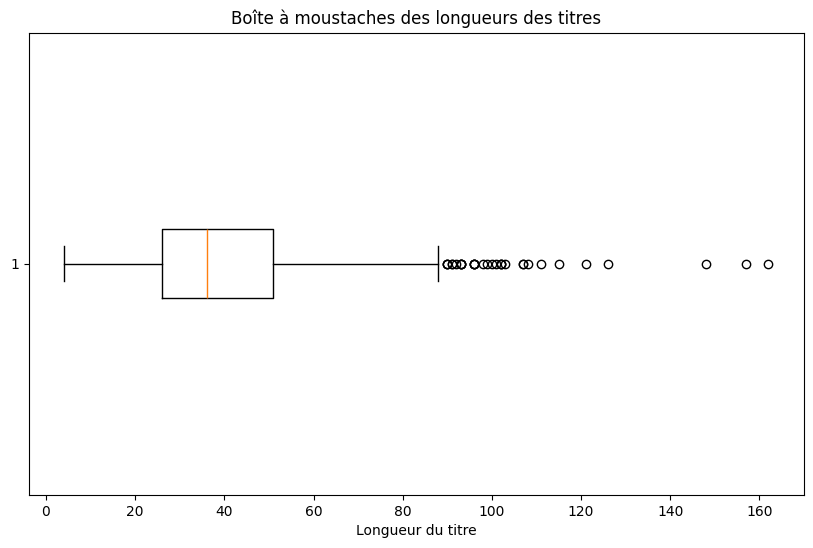

Titres les plus longs:
                                                  title  title_length
589   Mittelgroßes Modell  Edelstahl mit schwarzer B...           162
263   Mattschwarze extrem widerstandsfähige Keramik ...           157
663   DER GETÖNTE UND FEUCHTIGKEITSSPENDENDE BALSAM ...           148
1360  ULTRALEICHTE FORMEL MIT LANGEM HALT FÜR EIN SA...           126
965   Edelstahl und Diamanten  samtweicher schwarzer...           121
596   Extrem widerstandsfähige weiße Keramik und Ede...           115
258   Extrem widerstandsfähige schwarze Keramik und ...           111
959   Extrem widerstandsfähige weiße Keramik und Ede...           108
216   Mittelgroßes Modell  BEIGEGOLD und Diamanten  ...           107
601   Mittelgroßes Modell  Edelstahl und Diamanten  ...           107

Titres les plus courts:
    title  title_length
1    n.a.             4
53   Blau             4
58   n.a.             4
83   n.a.             4
92   n.a.             4
102  n.a.             4
104  n.a.     

In [ ]:
# Calcul de la longueur des titres
df['title_length'] = df['title'].astype(str).apply(len)

# Statistiques descriptives de la longueur des titres
title_length_stats = df['title_length'].describe()
print(title_length_stats)

# Histogramme de la longueur des titres
plt.figure(figsize=(10, 6))
plt.hist(df['title_length'], bins=30, edgecolor='k')
plt.title('Distribution des longueurs des titres')
plt.xlabel('Longueur du titre')
plt.ylabel('Nombre de produits')
plt.show()

# Boîte à moustaches de la longueur des titres
plt.figure(figsize=(10, 6))
plt.boxplot(df['title_length'], vert=False)
plt.title('Boîte à moustaches des longueurs des titres')
plt.xlabel('Longueur du titre')
plt.show()

# Analyse des titres les plus longs et les plus courts
print("Titres les plus longs:")
print(df.nlargest(10, 'title_length')[['title', 'title_length']])

print("\nTitres les plus courts:")
print(df.nsmallest(10, 'title_length')[['title', 'title_length']])

### **Distribution des catégories et des prix :**
* Explorer les price avec des histogrammes ou des boxplots.

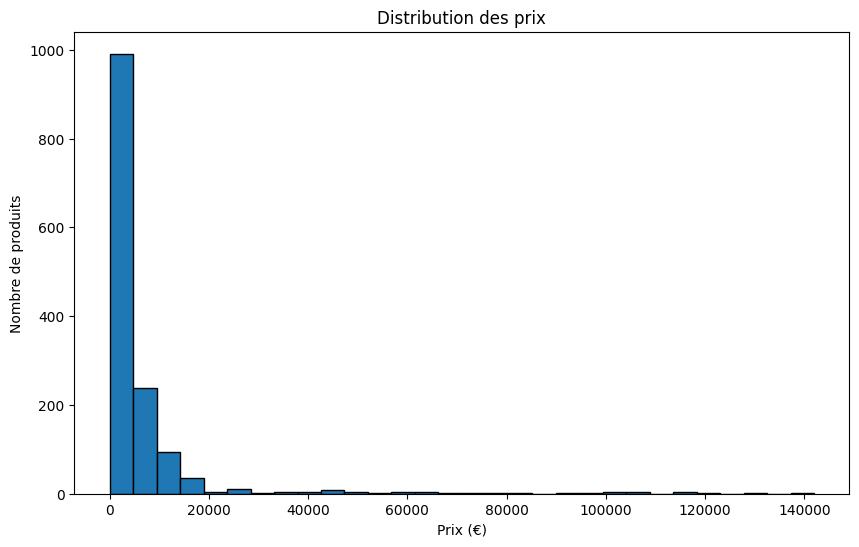

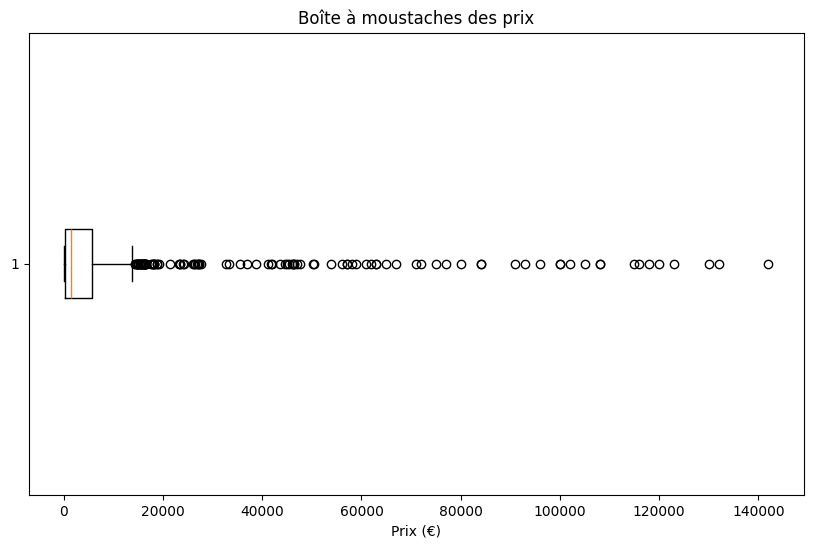

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='k')
plt.title('Distribution des prix')
plt.xlabel('Prix (€)')
plt.ylabel('Nombre de produits')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False)
plt.title('Boîte à moustaches des prix')
plt.xlabel('Prix (€)')
plt.show()

##### **Analyse des images :**
* Évaluer la diversité des couleurs avec des histogrammes ou des palettes de couleurs.
* Rechercher des anomalies ou des données manquantes.

#### **° Analyse de la qualité et de la diversité des images (dimensions, couleurs, formats).**

In [ ]:
def download_image(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))
        return img
    except Exception as e:
        #print(f"Erreur lors du téléchargement de l'image: {e}")
        return None

from tqdm import tqdm
tqdm.pandas()

df['image'] = df['imageurl'].progress_apply(download_image)

100%|██████████| 1428/1428 [04:14<00:00,  5.61it/s]


In [ ]:
count_none = df['image'].isnull().sum()
count_none

234

In [ ]:
len(df)

1428

In [ ]:
df = df.dropna(subset=['image'])
len(df)

1194

In [ ]:
dimensions = []
formats = []
color_modes = []

for img in df['image'].dropna():
    try:
        dimensions.append(img.size)

        formats.append(img.format)

        color_modes.append(img.mode)
    except Exception as e:
        print(f"Erreur lors de l'analyse d'une image : {e}")

dimension_counts = Counter(dimensions)
format_counts = Counter(formats)
color_mode_counts = Counter(color_modes)

##### **Dimensions**

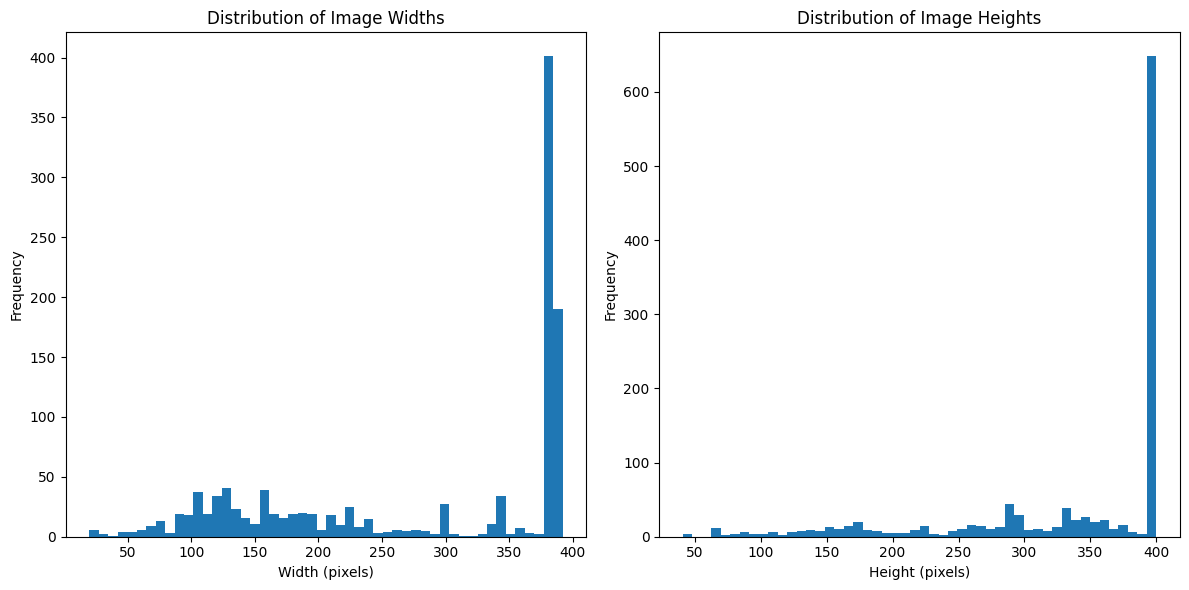

In [ ]:
widths = [dim[0] for dim in dimensions]
heights = [dim[1] for dim in dimensions]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=50)
plt.xlabel("Width (pixels)")
plt.ylabel("Frequency")
plt.title("Distribution of Image Widths")

plt.subplot(1, 2, 2)
plt.hist(heights, bins=50)
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")
plt.title("Distribution of Image Heights")

plt.tight_layout()
plt.show()

##### **Format**

In [ ]:
print("\nAnalyse des formats d'image")
for fmt, count in format_counts.items():
    print(f"{fmt} : {count} images")


Analyse des formats d'image
JPEG : 687 images
PNG : 507 images


##### **Modes de couleur**


Analyse des modes de couleur :
RGB : 686 images
P : 506 images
RGBA : 1 images
L : 1 images


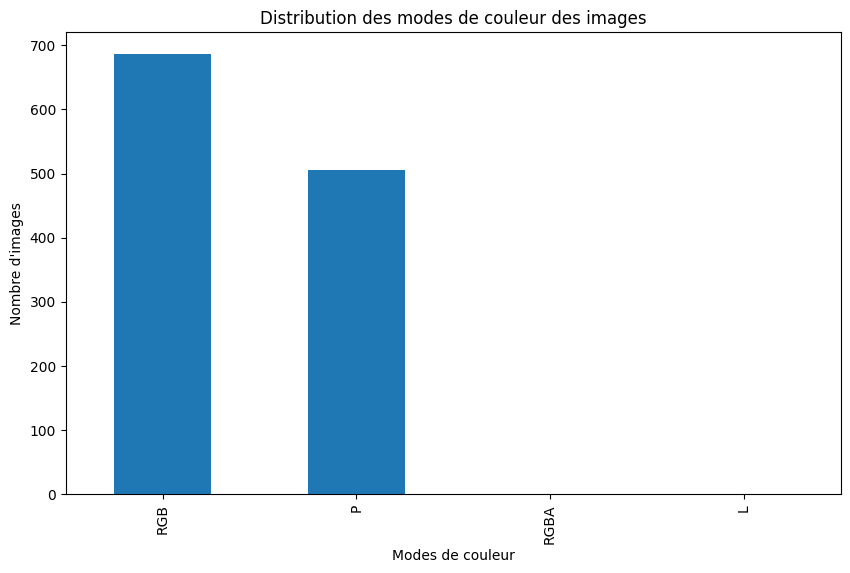

In [ ]:
print("\nAnalyse des modes de couleur :")
for mode, count in color_mode_counts.items():
    print(f"{mode} : {count} images")

color_modes_df = pd.DataFrame.from_dict(color_mode_counts, orient='index', columns=['count'])
color_modes_df.index.name = 'color_mode'
color_modes_df = color_modes_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
color_modes_df['count'].plot(kind='bar')
plt.title("Distribution des modes de couleur des images")
plt.xlabel("Modes de couleur")
plt.ylabel("Nombre d'images")
plt.show()

#### **° Identification des biais éventuels dans le dataset, comme la sur-représentation de certaines catégories.**

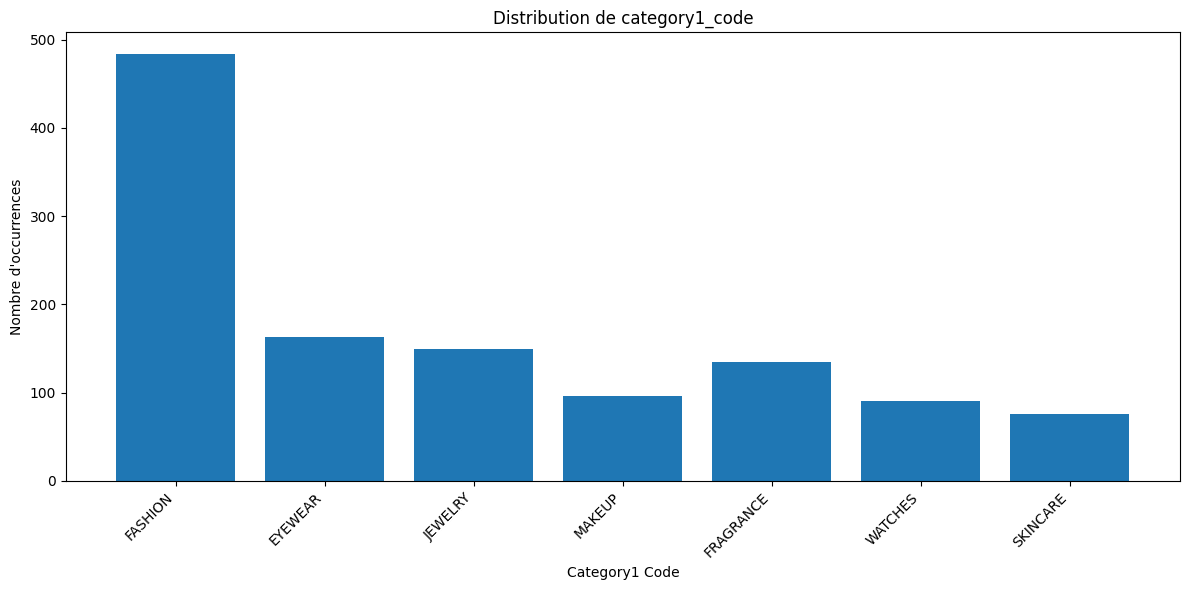

In [ ]:
category1_counts = Counter(df['category1_code'])
category1_labels = list(category1_counts.keys())
category1_values = list(category1_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(category1_labels, category1_values)
plt.xlabel("Category1 Code")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution de category1_code")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Catégorie **FASHION** est sur-représentée.

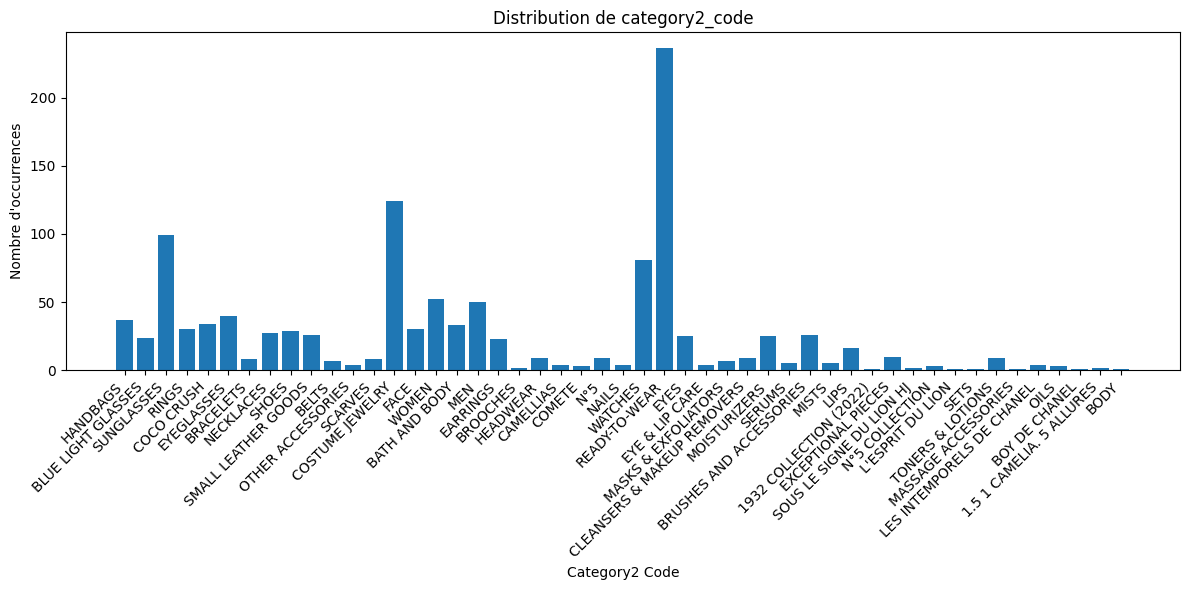

In [ ]:
category2_counts = Counter(df['category2_code'])
category2_labels = list(category2_counts.keys())
category2_values = list(category2_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(category2_labels, category2_values)
plt.xlabel("Category2 Code")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution de category2_code")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Catégorie **READY-TO-WEAR** est sur-représentée.

* **Identifier les catégories avec peu ou pas d’exemples.**

Categories with low occurrences:
- HANDBAGS: 37 examples
- BLUE LIGHT GLASSES: 24 examples
- SUNGLASSES: 99 examples
- RINGS: 30 examples
- COCO CRUSH: 34 examples
- EYEGLASSES: 40 examples
- BRACELETS: 8 examples
- NECKLACES: 27 examples
- SHOES: 29 examples
- SMALL LEATHER GOODS: 26 examples
- BELTS: 7 examples
- OTHER ACCESSORIES: 4 examples
- SCARVES: 8 examples
- COSTUME JEWELRY: 124 examples
- FACE: 30 examples
- WOMEN: 52 examples
- BATH AND BODY: 33 examples
- MEN: 50 examples
- EARRINGS: 23 examples
- BROOCHES: 2 examples
- HEADWEAR: 9 examples
- CAMELLIAS: 4 examples
- COMETE: 3 examples
- N°5: 9 examples
- NAILS: 4 examples
- WATCHES: 81 examples
- READY-TO-WEAR: 236 examples
- EYES: 25 examples
- EYE & LIP CARE: 4 examples
- MASKS & EXFOLIATORS: 7 examples
- CLEANSERS & MAKEUP REMOVERS: 9 examples
- MOISTURIZERS: 25 examples
- SERUMS: 5 examples
- BRUSHES AND ACCESSORIES: 26 examples
- MISTS: 5 examples
- LIPS: 16 examples
- 1932 COLLECTION (2022): 1 examples
- EXCEPTIONAL 

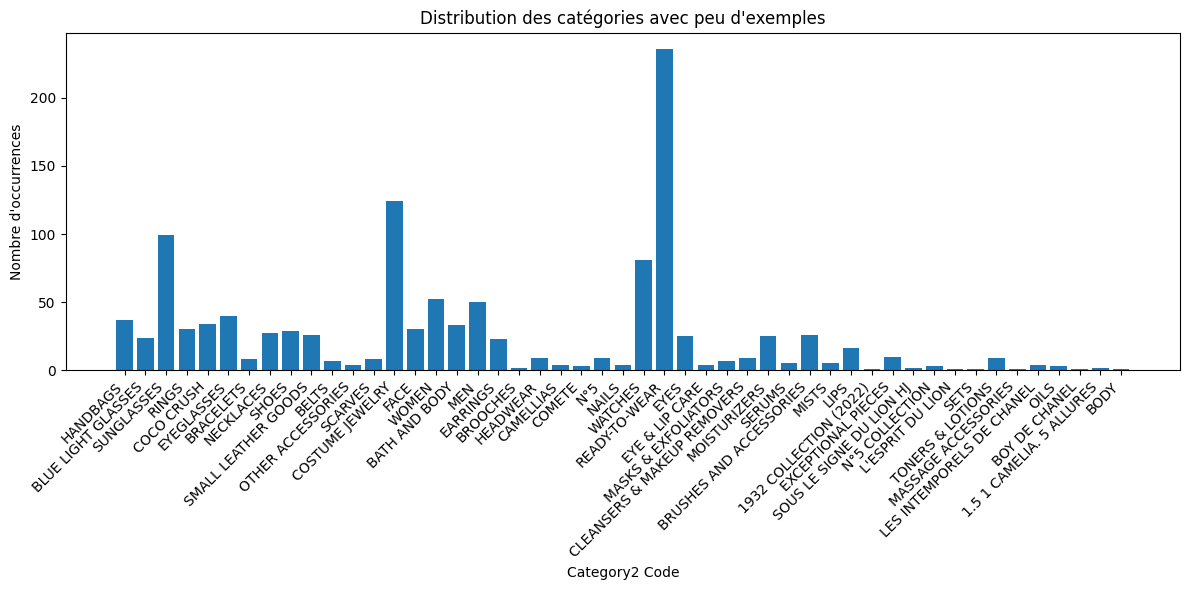

In [ ]:
category2_counts = Counter(df['category2_code'])

threshold = len(df)

low_occurrence_categories = [category for category, count in category2_counts.items() if count <= threshold]

print("Categories with low occurrences:")
for category in low_occurrence_categories:
    print(f"- {category}: {category2_counts[category]} examples")

# Visualization of low-occurrence categories
low_occurrence_df = pd.DataFrame({'Category': low_occurrence_categories, 'Count': [category2_counts[category] for category in low_occurrence_categories]})
plt.figure(figsize=(12,6))
plt.bar(low_occurrence_df['Category'], low_occurrence_df['Count'])
plt.xlabel("Category2 Code")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des catégories avec peu d'exemples")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### **2. Préparation des données**

#### **° Prétraitement des images : redimensionnement, normalisation, et augmentation.**

**Remarque: Fait sur la partie 2 du projet**



In [ ]:
import tensorflow as tf
from PIL import Image, ImageOps, ImageFilter
import numpy as np

def augmented_data(image):
    """
    Applique un ensemble de transformations augmentées à une image.
    :param image: Image sous forme de tableau NumPy.
    :return: Dictionnaire des images transformées.
    """
    # Si l'image est normalisée [0, 1], la convertir en [0, 255]
    if image.max() <= 1.0:
        image = (image * 255).astype(np.uint8)

    # Convertir en TensorFlow tensor
    image_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
    image_tensor = tf.image.resize(image_tensor, [224, 224])  # Taille cible fixe

    augmented = {
        'original': image
    }

    augmented.update({
        'rotated': tf.image.rot90(image_tensor, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)),
        'zoomed': tf.image.central_crop(image_tensor, central_fraction=tf.random.uniform(shape=[], minval=0.8, maxval=1.0)),
        'brightness': tf.image.random_brightness(image_tensor, max_delta=0.2),
        'contrast': tf.image.random_contrast(image_tensor, lower=0.8, upper=1.2),
        'flipped': tf.image.random_flip_left_right(image_tensor),
    })

    # Convertir en tableau NumPy pour Pillow
    image_pillow = Image.fromarray(image.astype(np.uint8))

    augmented.update({
        'grayscale': image_pillow.convert('L'),
        'sepia': ImageOps.colorize(ImageOps.grayscale(image_pillow), (0, 0, 0), (255, 165, 0)),
        'inverted': ImageOps.invert(image_pillow),
        'blurred': image_pillow.filter(ImageFilter.BLUR),
        'posterized': ImageOps.posterize(image_pillow, 4),
        'solarized': ImageOps.solarize(image_pillow, threshold=128),
        'emboss': image_pillow.filter(ImageFilter.EMBOSS),
    })

    # Retourner les résultats
    return augmented

###### **Uniformisation des modes de couleurs**

In [ ]:
def convert_to_rgb(image):
    """
    Convertit une image au format RGB.
    """
    if image.mode != "RGB":
        image = image.convert("RGB")
    return image

In [ ]:
df.loc[:, 'image'] = df['image'].apply(lambda img: convert_to_rgb(img))

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
print("\nAnalyse des modes de couleur après conversion:")
color_mode_counts = Counter(df['image'].apply(lambda img: img.mode))
for mode, count in color_mode_counts.items():
    print(f"{mode} : {count} images")


Analyse des modes de couleur après conversion:
RGB : 1194 images


## 3. Visualisation

#### **° Exemples visuels des produits pour chaque catégorie majeure.**

In [ ]:
import matplotlib.pyplot as plt

def display_one_image_per_category(df, category_column, image_column='image'):
    categories = df[category_column].unique()

    for category in categories:
        print(f"Category: {category}")
        category_image = df[df[category_column] == category][image_column].iloc[0]

        try:
            plt.figure(figsize=(5, 5))
            plt.imshow(category_image)
            plt.axis('off')
            plt.title(f"Category: {category}")
            plt.show()
        except Exception as e:
            print(f"Could not display image for category '{category}': {e}")

Category: FASHION


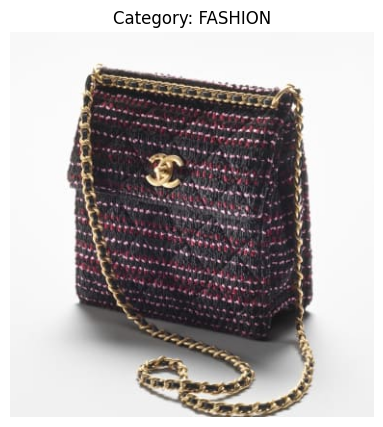

Category: EYEWEAR


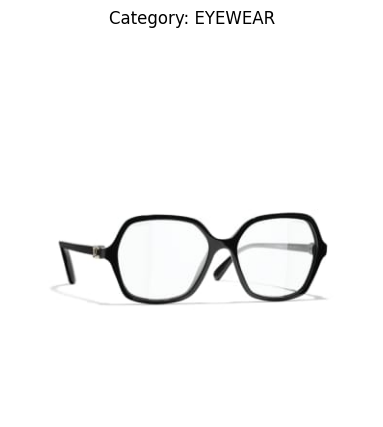

Category: JEWELRY


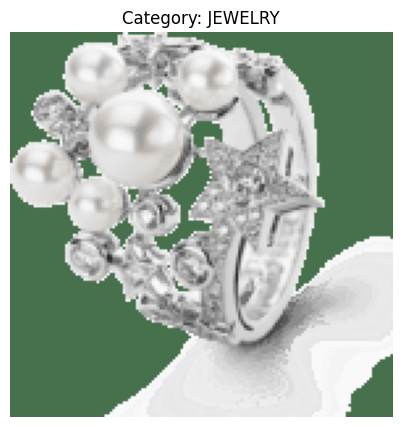

Category: MAKEUP


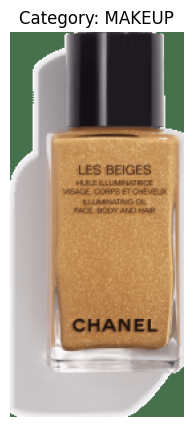

Category: FRAGRANCE


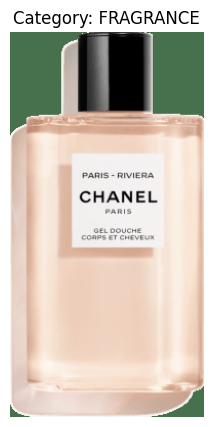

Category: WATCHES


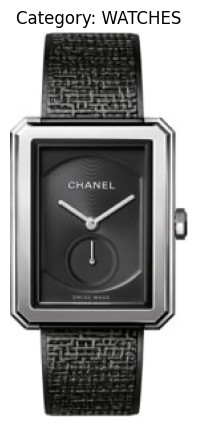

Category: SKINCARE


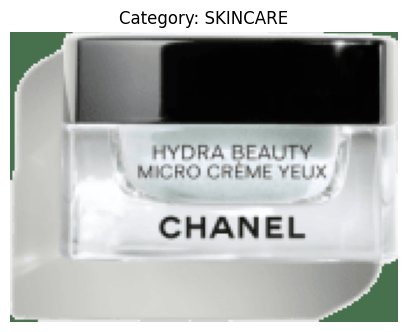

In [ ]:
display_one_image_per_category(df, 'category1_code')

Category: HANDBAGS


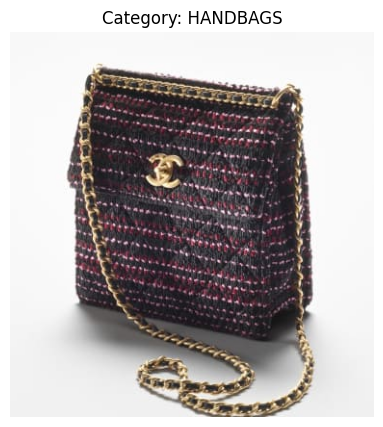

Category: BLUE LIGHT GLASSES


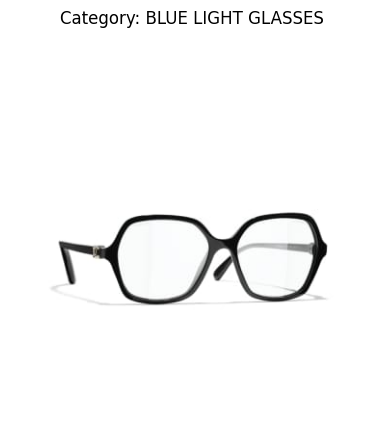

Category: SUNGLASSES


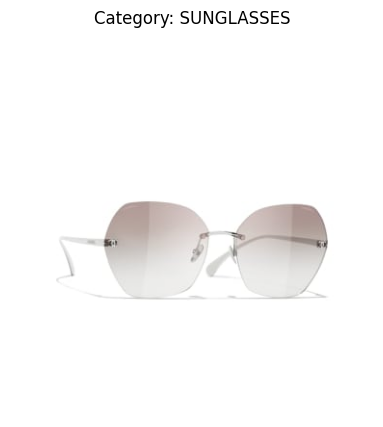

Category: RINGS


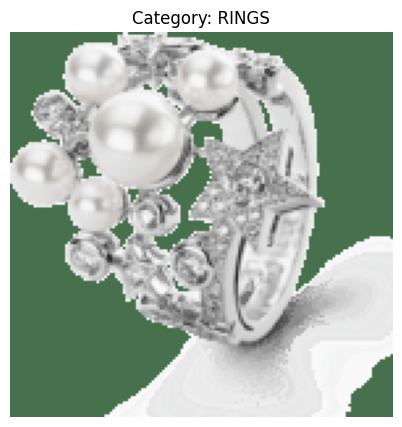

Category: COCO CRUSH


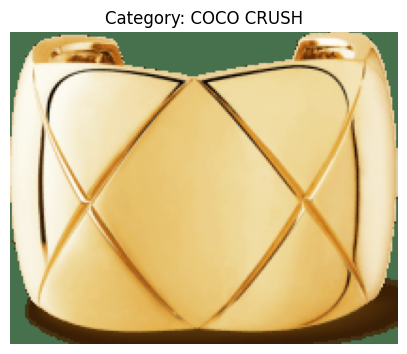

Category: EYEGLASSES


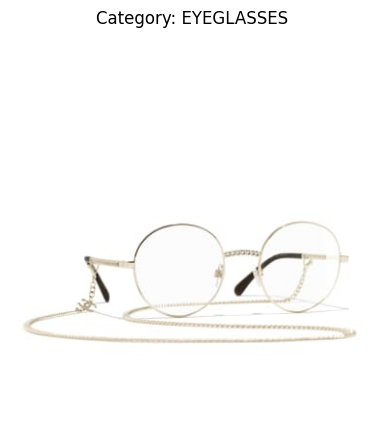

Category: BRACELETS


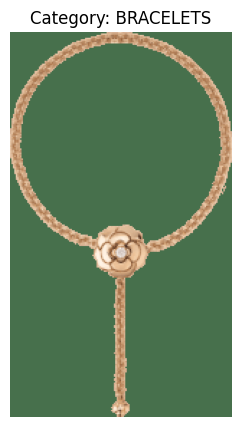

Category: NECKLACES


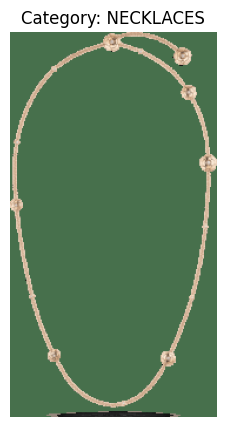

Category: SHOES


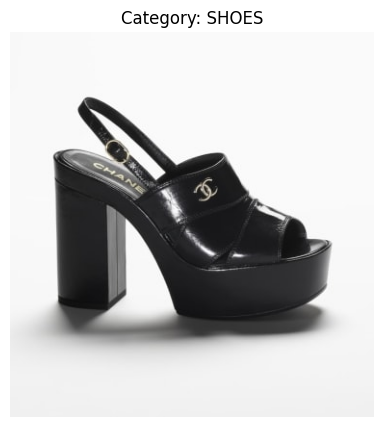

Category: SMALL LEATHER GOODS


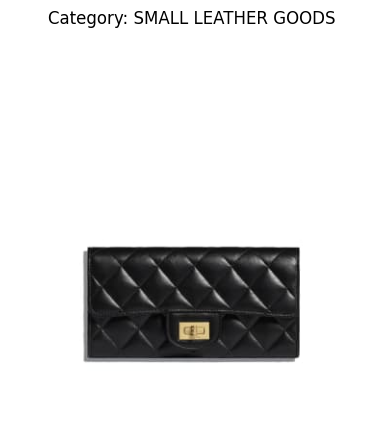

Category: BELTS


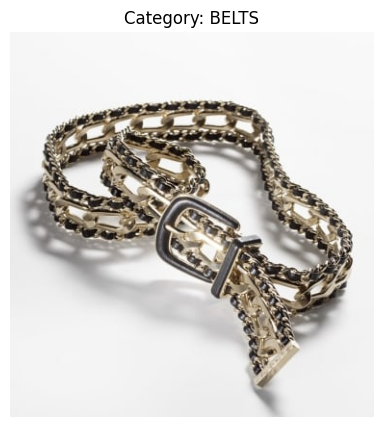

Category: OTHER ACCESSORIES


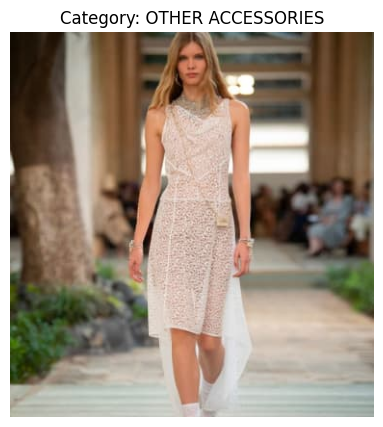

Category: SCARVES


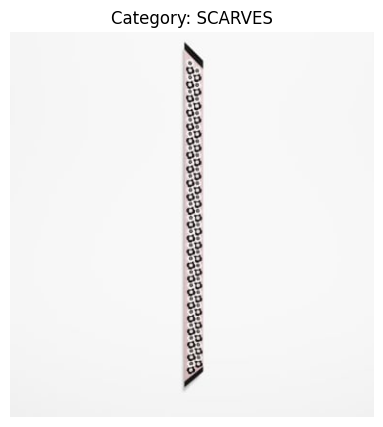

Category: COSTUME JEWELRY


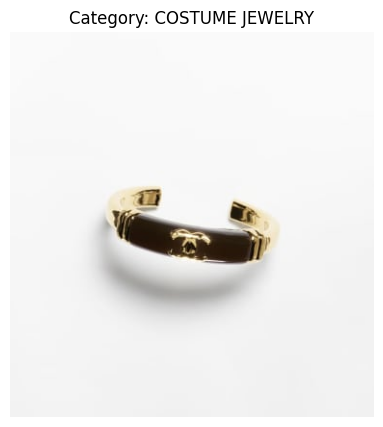

Category: FACE


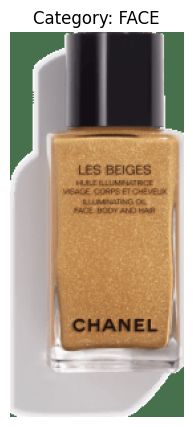

Category: WOMEN


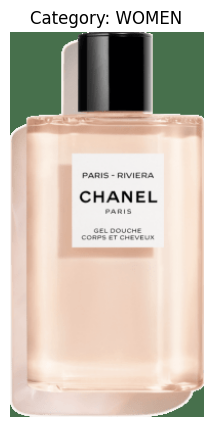

Category: BATH AND BODY


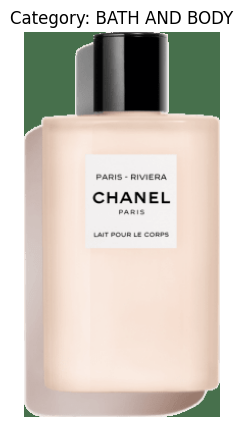

Category: MEN


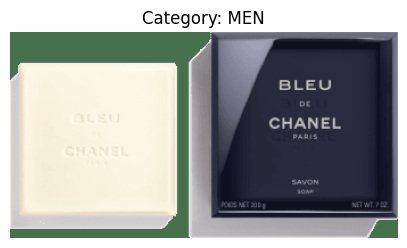

Category: EARRINGS


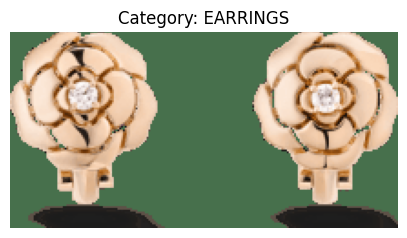

Category: BROOCHES


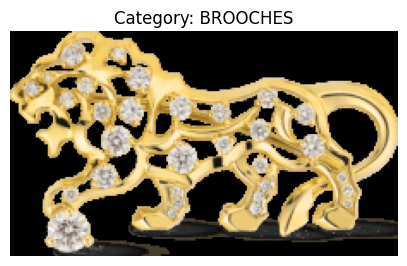

Category: HEADWEAR


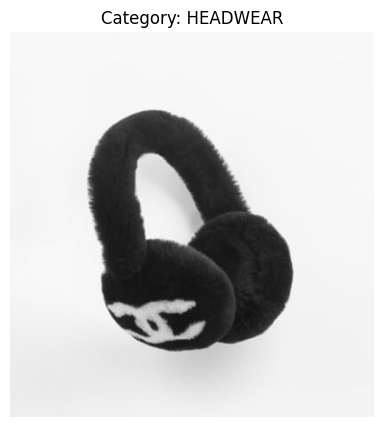

Category: CAMELLIAS


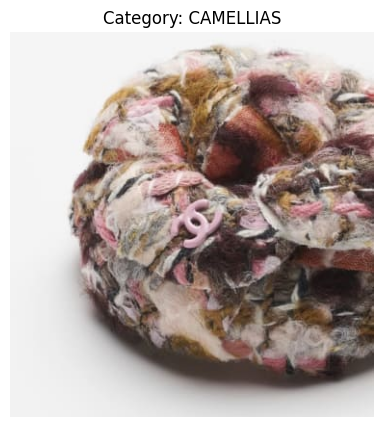

Category: COMETE


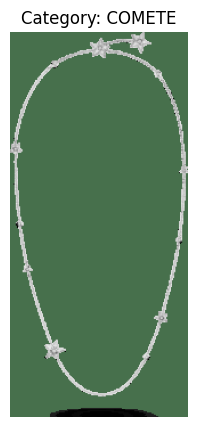

Category: N°5


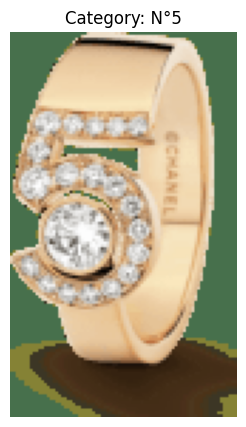

Category: NAILS


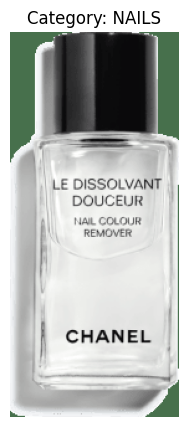

Category: WATCHES


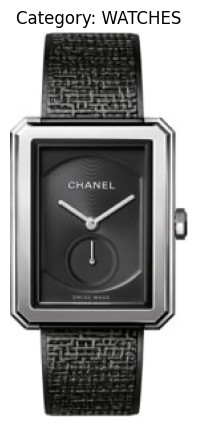

Category: READY-TO-WEAR


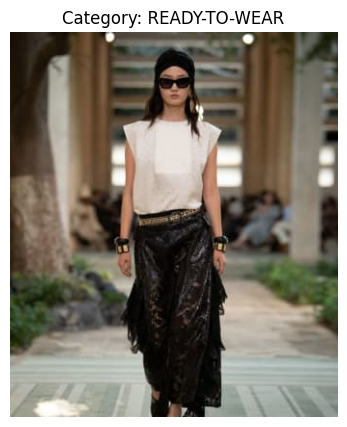

Category: EYES


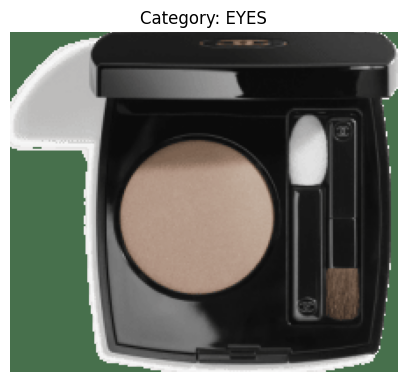

Category: EYE & LIP CARE


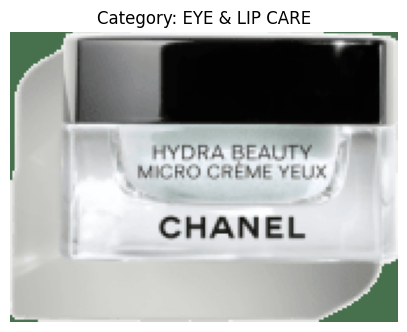

Category: MASKS & EXFOLIATORS


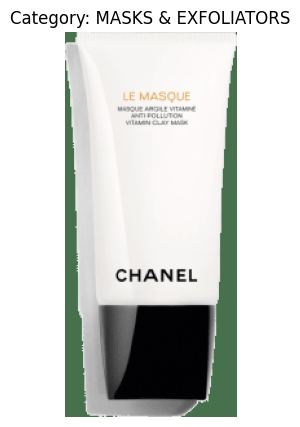

Category: CLEANSERS & MAKEUP REMOVERS


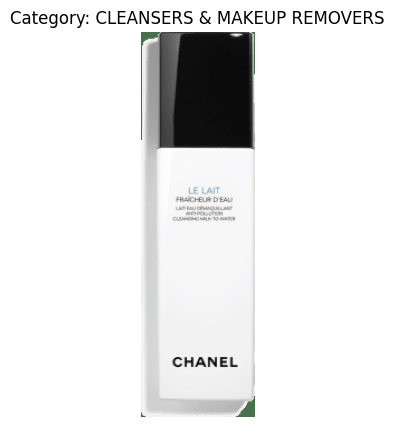

Category: MOISTURIZERS


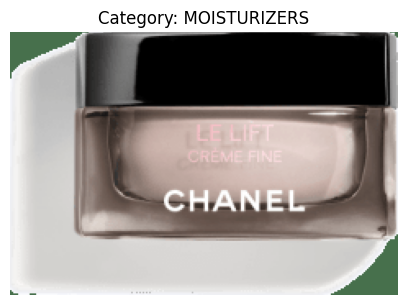

Category: SERUMS


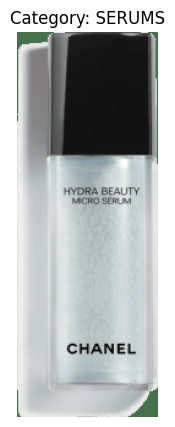

Category: BRUSHES AND ACCESSORIES


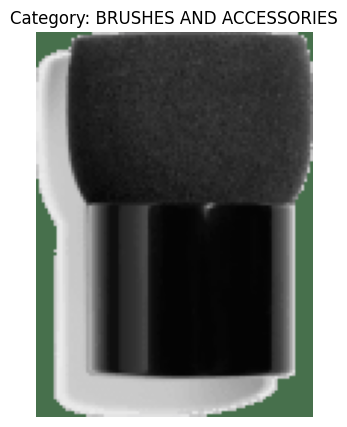

Category: MISTS


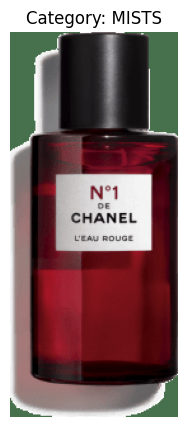

Category: LIPS


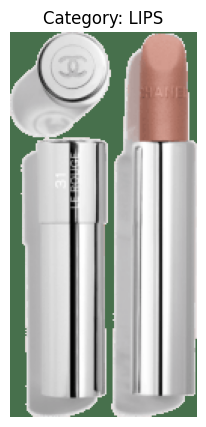

Category: 1932 COLLECTION (2022)


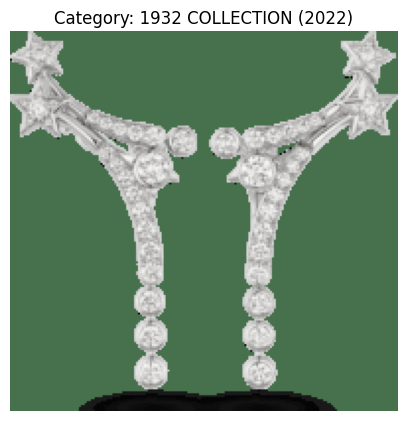

Category: EXCEPTIONAL PIECES


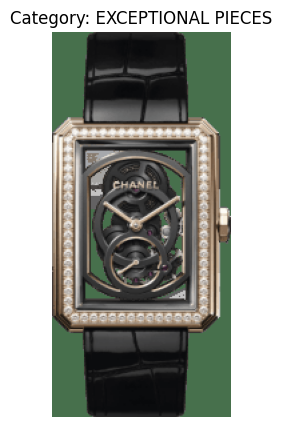

Category: SOUS LE SIGNE DU LION HJ


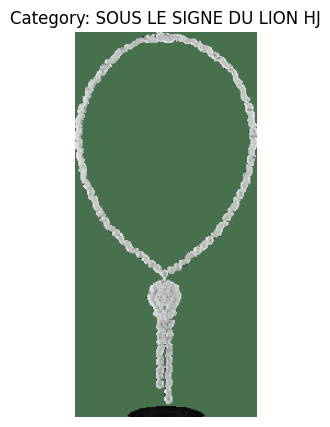

Category: N°5 COLLECTION


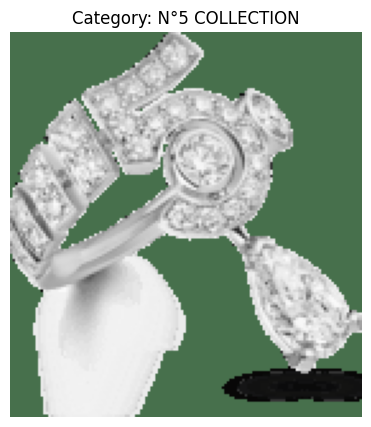

Category: L'ESPRIT DU LION


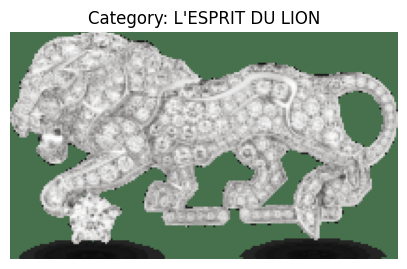

Category: SETS


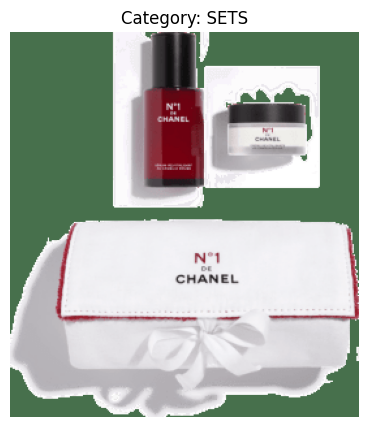

Category: TONERS & LOTIONS


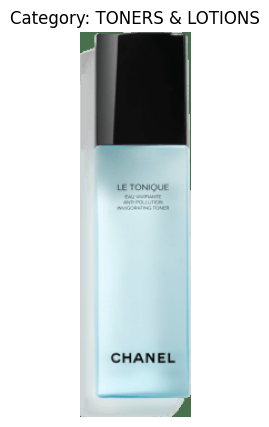

Category: MASSAGE ACCESSORIES


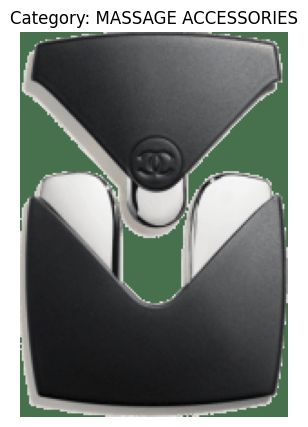

Category: LES INTEMPORELS DE CHANEL


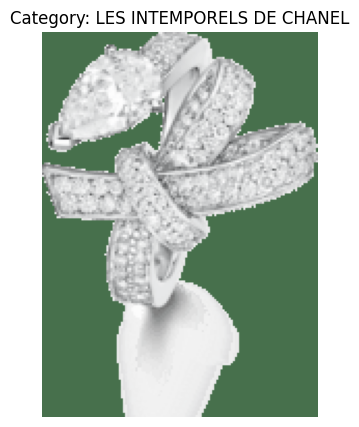

Category: OILS


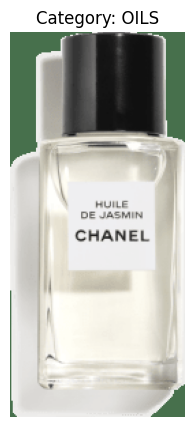

Category: BOY DE CHANEL


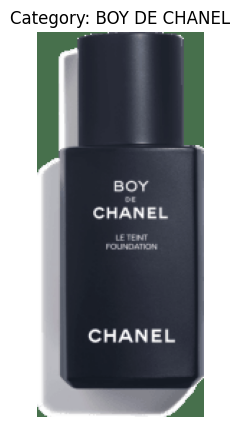

Category: 1.5 1 CAMELIA. 5 ALLURES


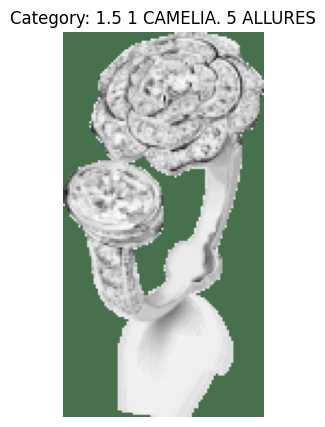

Category: BODY


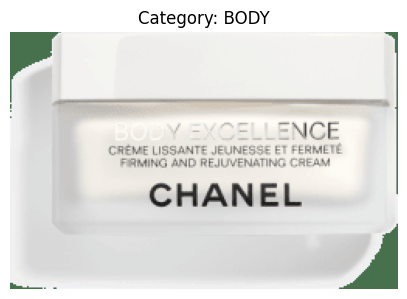

In [ ]:
display_one_image_per_category(df, 'category2_code')